In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
## import some basic libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset =pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into independent and dependent features

In [ ]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Feature Engineering

In [ ]:
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [ ]:
X = X.drop(['Geography', 'Gender'], axis = 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X, geography, gender], axis = 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
## Part 2 Now lets create the ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
### Lets initialize the ANN
classifier = Sequential()

In [ ]:
###  Adding the Input layer
classifier.add(Dense(units= 14, activation= 'relu'))

In [ ]:
# adding the first hidden layer
classifier.add(Dense(units= 7, activation = 'relu'))
# adding the dropout to stop overfitting
classifier.add(Dropout(0.2))

In [ ]:
# Hadden the second hidden layer
classifier.add(Dense(units= 6, activation= 'relu'))
classifier.add(Dropout(0.3))

In [ ]:
## Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate= 0.01)

In [ ]:
classifier.compile(optimizer= opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
## Early Stopping
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size= 10, epochs= 1000, callbacks= early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 7ms/step - loss: 0.4590 - accuracy: 0.7962 - val_loss: 0.4009 - val_accuracy: 0.8179
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4053 - accuracy: 0.8233 - val_loss: 0.3796 - val_accuracy: 0.8432
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3904 - accuracy: 0.8375 - val_loss: 0.3716 - val_accuracy: 0.8470
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3792 - accuracy: 0.8393 - val_loss: 0.3918 - val_accuracy: 0.8345
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3851 - accuracy: 0.8399 - val_loss: 0.3727 - val_accuracy: 0.8425
Epoch 6/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3739 - accuracy: 0.8461 - val_loss: 0.3760 - val_accuracy: 0.8432
Epoch 7/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3784 - accuracy: 0.8438 - val_loss: 0.3733 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

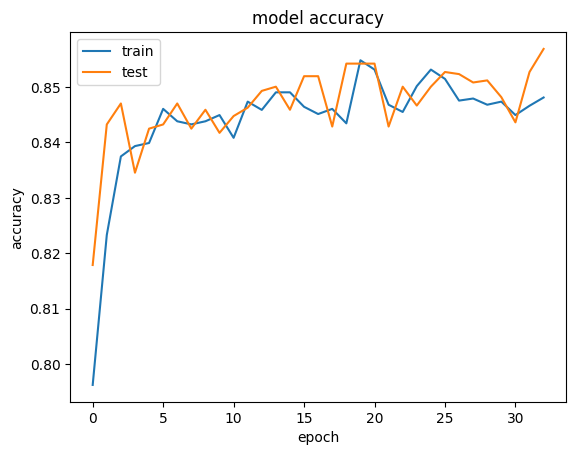

In [ ]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

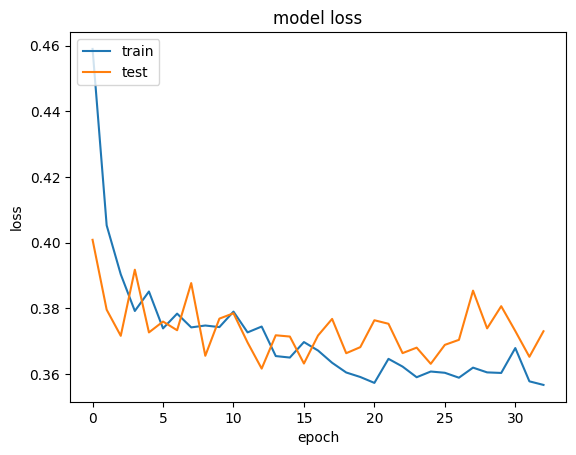

In [ ]:
# Summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
## make the confusion matrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1509,   86],
       [ 196,  209]])

In [ ]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [ ]:
score

0.859

In [ ]:
## Get the weights
classifier.get_weights()

[array([[ 5.71824610e-01, -3.12646806e-01,  4.83166605e-01,
         -9.68499959e-01, -4.29792097e-03,  2.63391286e-01,
          1.80303067e-01, -1.58651024e-01,  8.52823257e-02,
          8.98434758e-01,  4.95172292e-01, -5.27405143e-01,
          1.01848006e+00, -1.71867818e-01],
        [-7.96723604e-01, -3.00286007e+00, -8.41544330e-01,
          5.30233271e-02,  6.18345618e-01,  1.69247890e+00,
         -1.91143379e-01, -3.07234973e-02,  8.77390981e-01,
         -2.30567336e+00,  9.20772851e-01,  1.96682739e+00,
         -3.83964896e-01, -1.11134994e+00],
        [ 9.54131544e-01, -1.06768936e-01,  6.31849468e-01,
          3.49704713e-01, -2.83826709e-01, -6.79963171e-01,
          5.67625642e-01, -3.40125382e-01,  2.23662004e-01,
         -4.27567869e-01,  5.51715851e-01,  3.01423609e-01,
          3.37517500e-01,  9.66590643e-01],
        [-3.35864097e-01, -3.69716913e-01, -1.68299270e+00,
          9.55139101e-02, -1.71646976e+00, -3.59114140e-01,
         -2.54819536e+00,  4